In [80]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [98]:
dir = "p_date=2023-01-06-09_55_03"

In [99]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

51001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [100]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [101]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

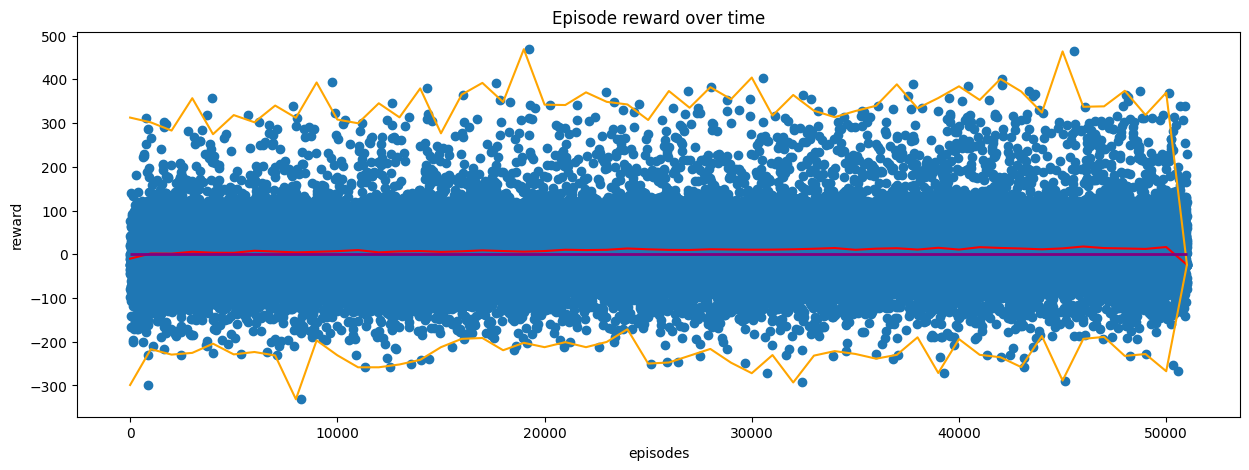

Maximum: 468.75
Average: 9.340585478716106

Values: -10.1 > 1.7 > 1.4 > 5.7 > 3.5 > 3.3 > 8.0 > 6.1 > 4.3 > 5.5 > 7.1 > 9.5 > 4.3 > 6.6 > 7.3 > 5.3 > 6.7 > 8.8 > 7.3 > 5.9 > 7.3 > 10.3 > 9.5 > 10.2 > 13.2 > 11.3 > 10.0 > 9.8 > 11.4 > 10.8 > 10.4 > 10.6 > 11.3 > 12.6 > 14.2 > 10.2 > 12.8 > 13.8 > 10.7 > 14.8 > 10.7 > 16.2 > 14.4 > 13.1 > 11.3 > 13.4 > 17.7 > 14.1 > 13.2 > 12.2 > 16.5 > -24.0

Minimum (last 1000): -331.5
Average (last 1000): 9.197935041299175
Maximum (last 1000): 468.75


In [102]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

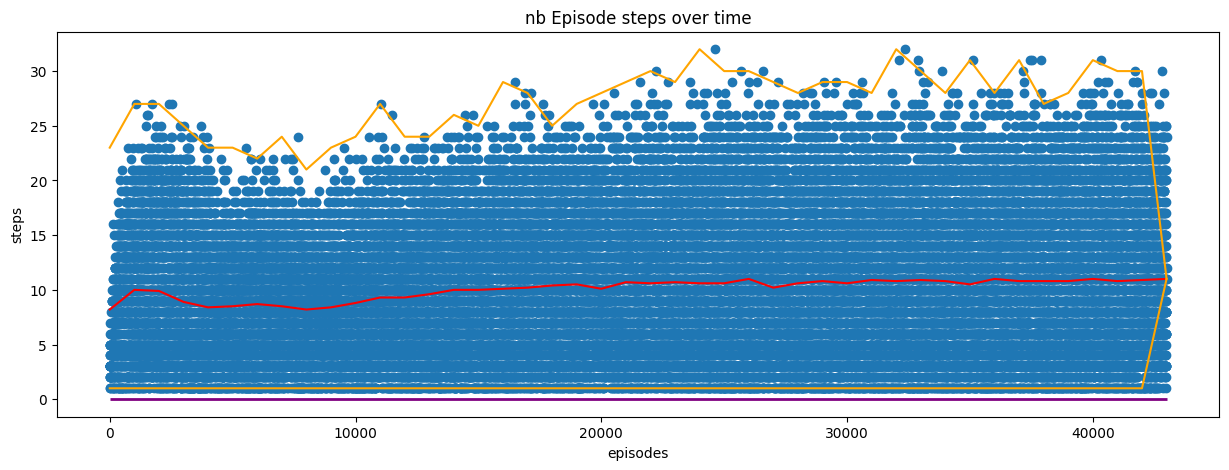

Maximum: 32
Average: 10.060882305062673

Values: 8.2 > 10.0 > 9.9 > 8.9 > 8.4 > 8.5 > 8.7 > 8.5 > 8.2 > 8.4 > 8.8 > 9.3 > 9.3 > 9.6 > 10.0 > 10.0 > 10.1 > 10.2 > 10.4 > 10.5 > 10.1 > 10.7 > 10.6 > 10.7 > 10.6 > 10.6 > 11.0 > 10.2 > 10.6 > 10.8 > 10.6 > 10.9 > 10.8 > 10.9 > 10.8 > 10.5 > 11.0 > 10.8 > 10.8 > 10.8 > 11.0 > 10.8 > 10.9 > 11

Minimum (last 1000): 1
Average (last 1000): 10.040403799909527
Maximum (last 1000): 32


In [95]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

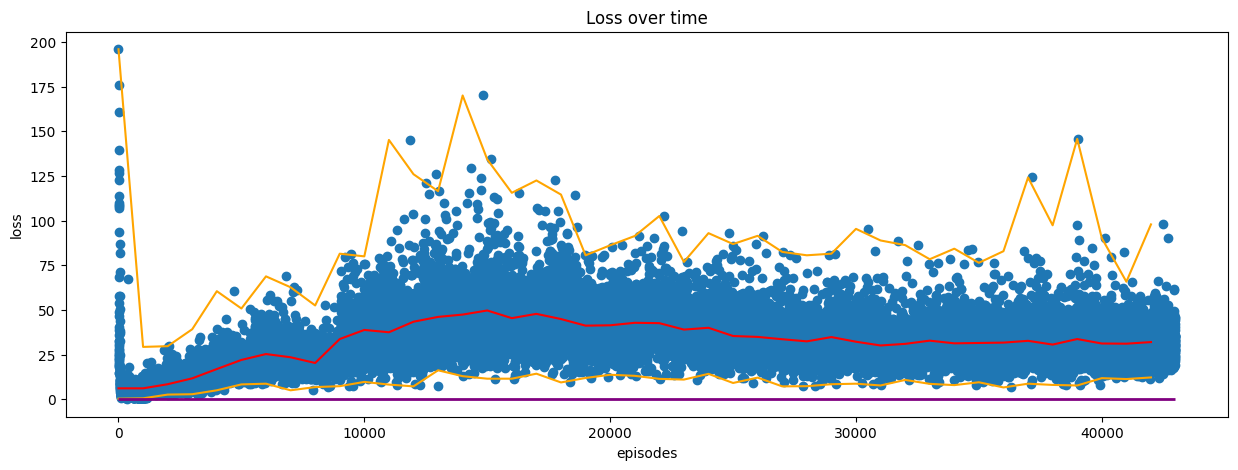

Maximum: 195.97986857096353
Average: 32.67139209892728

Values: 6.1 > 6.1 > 8.4 > 11.7 > 16.9 > 22.0 > 25.3 > 23.5 > 20.3 > 33.7 > 38.8 > 37.5 > 43.4 > 46.1 > 47.4 > 49.7 > 45.4 > 47.8 > 44.9 > 41.2 > 41.4 > 42.8 > 42.6 > 39.0 > 40.0 > 35.4 > 34.9 > 33.6 > 32.4 > 34.8 > 32.2 > 30.1 > 31.0 > 32.8 > 31.3 > 31.5 > 31.7 > 32.7 > 30.6 > 33.7 > 31.2 > 31.1 > 32.0

Minimum (last 1000): 0.32936692237854004
Average (last 1000): 32.687899129923274
Maximum (last 1000): 195.97986857096353


In [96]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

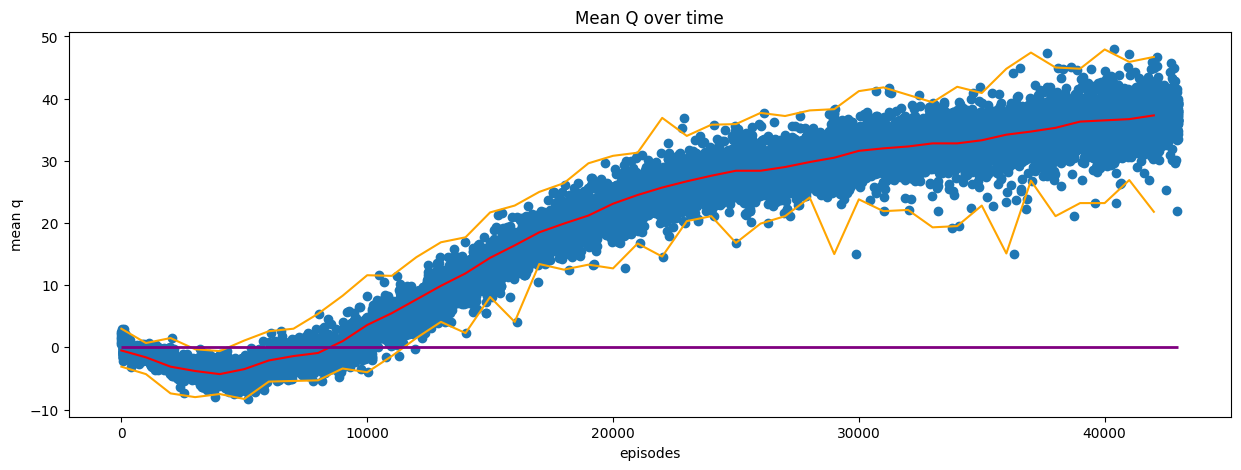

Maximum: 47.9381217956543
Average: 19.264559846573103

Values: -0.5 > -1.6 > -3.1 > -3.8 > -4.3 > -3.5 > -2.1 > -1.4 > -0.9 > 1.0 > 3.6 > 5.5 > 7.7 > 9.9 > 11.9 > 14.4 > 16.4 > 18.5 > 19.9 > 21.2 > 23.1 > 24.5 > 25.7 > 26.7 > 27.6 > 28.4 > 28.4 > 29.0 > 29.8 > 30.5 > 31.6 > 32.0 > 32.3 > 32.8 > 32.8 > 33.3 > 34.2 > 34.7 > 35.3 > 36.3 > 36.5 > 36.7 > 37.3

Minimum (last 1000): -8.336007118225098
Average (last 1000): 18.836405853049712
Maximum (last 1000): 47.9381217956543


In [97]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

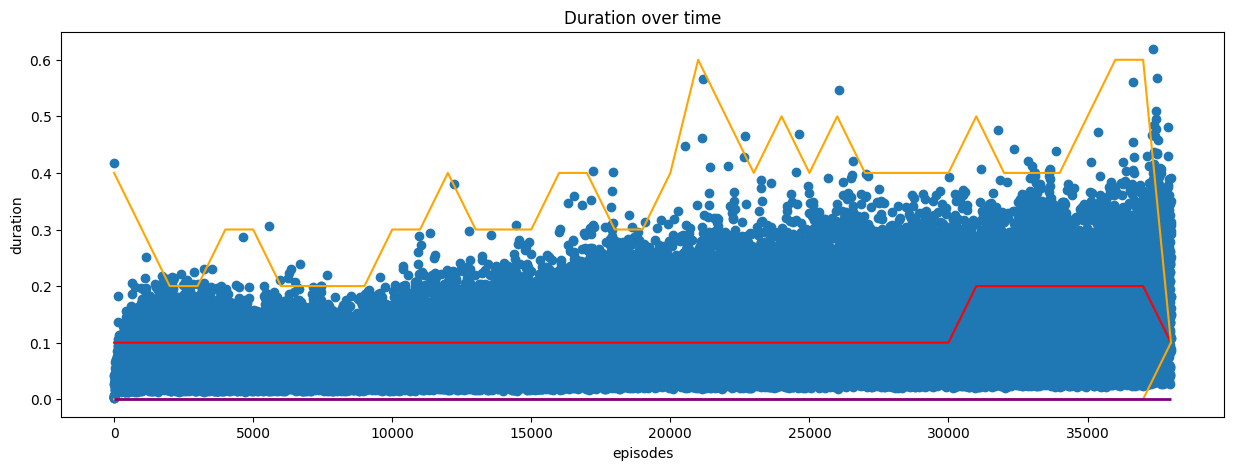

Maximum: 0.6186587000001964
Average: 0.11849471335754268

Values: 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.1

Minimum (last 1000): 0.002600900000000017
Average (last 1000): 0.11692174105564697
Maximum (last 1000): 0.5652004999999463


In [89]:
plot(duration, "Duration over time", "episodes", "duration")

In [103]:
import random


class Dice:
    value = 0

    def __init__(self, mock: int = -1):
        """Dice class

        :param mock: list of mock dice values, defaults to -1
        :param logging: _description_, defaults to False
        """
        random.seed()

        if mock > 0:
            self.value = mock
        else:
            self.roll()

    def roll(self):
        """Roll the dice"""
        self.value = random.randint(1, 6)

    def get(self):
        """Get value of the dice

        :return: value of the dice
        """
        return self.value

    def set(self, value: int):
        """Set value of the dice

        :param value: value to set
        """
        self.value = value

In [130]:
dices = {}

dices[0] = Dice()
dices[1] = Dice()
dices[2] = Dice()
dices[3] = Dice()
dices[4] = Dice()

print("Unsorted:")
for d in dices.values():
    print(d.value)

dices = dict(sorted(dices.items(), key=lambda item: item[1].value))

print("Sorted:")

for d in dices.values():
    print(d.value)

Unsorted:
2
5
1
4
3
Sorted:
1
2
3
4
5
